In [42]:
# importations
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses03_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated


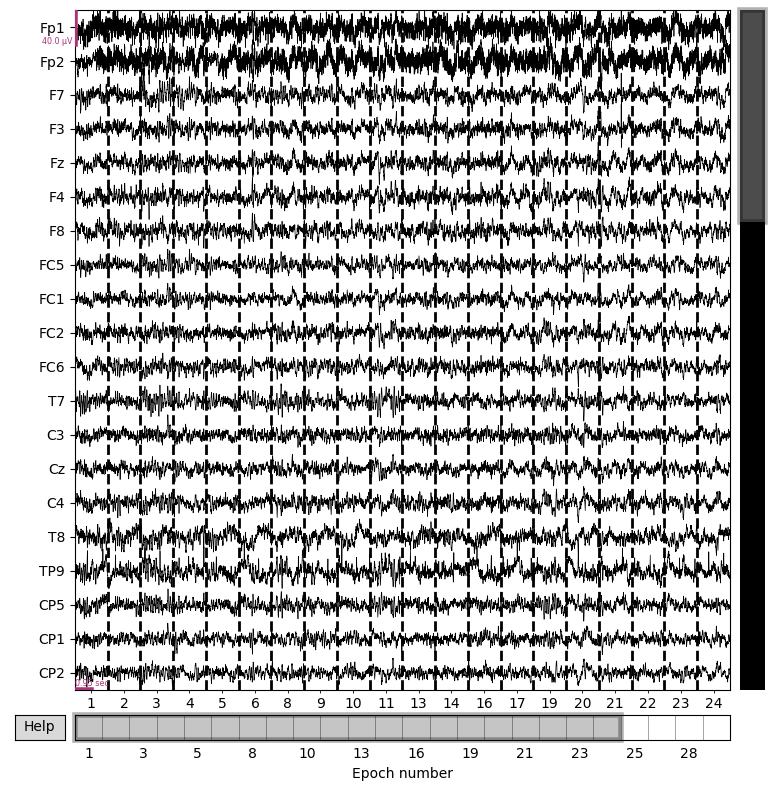

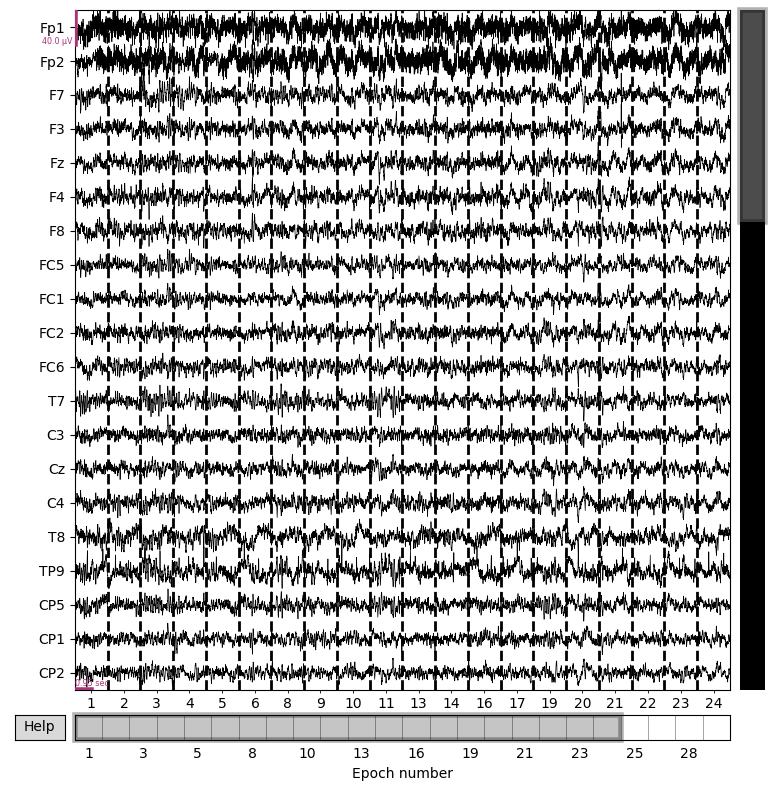

In [189]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses03_final-epo.fif'
epochs = mne.read_epochs(processed_dir)
epochs.plot()

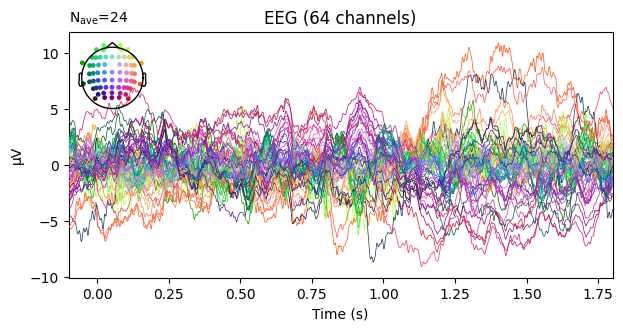

In [190]:
evoked = epochs.copy().average()
evoked.plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


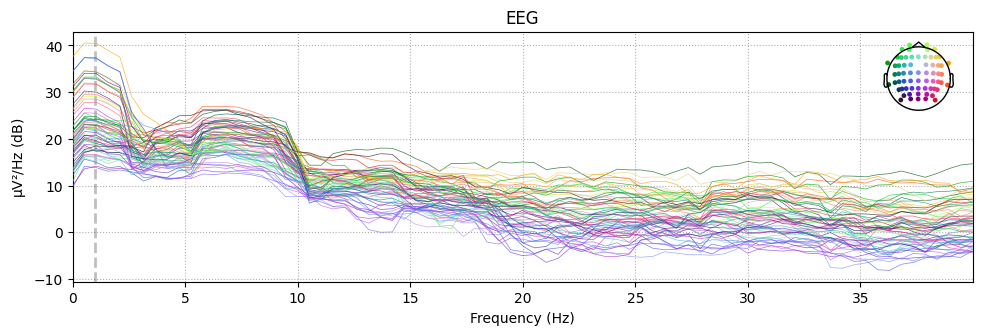

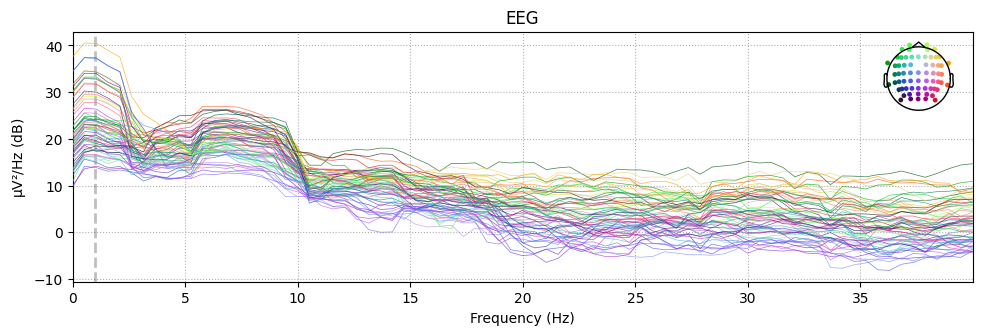

In [92]:
evoked.plot_psd(fmax=40)

In [72]:
evoked_new = evoked.copy().pick_channels(['FC6'])

In [75]:
epo_spectrum = evoked_new.compute_psd(fmax = 50)
psds, freqs = epo_spectrum.get_data(return_freqs=True)

    Using multitaper spectrum estimation with 7 DPSS windows


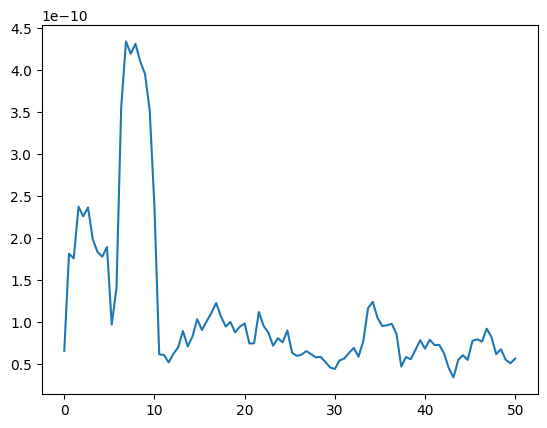

In [76]:
plt.plot(freqs,np.squeeze(psds))


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.53 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 0.53 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

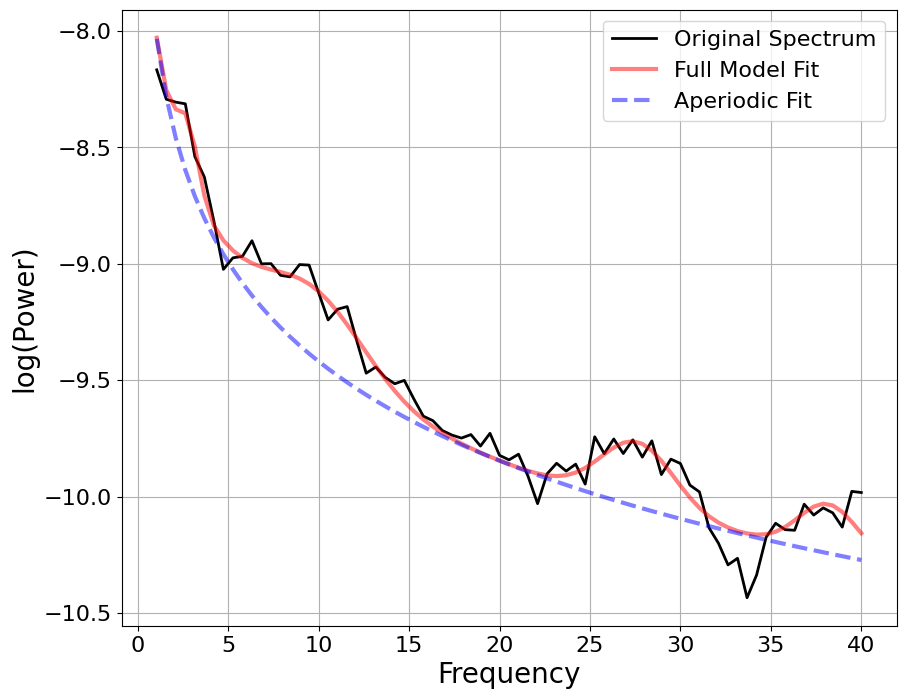

In [56]:
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_peak_search
# Initialize FOOOF object
fm = FOOOF()

# Define frequency range across which to model the spectrum
freq_range = [1, 40]

# Model the power spectrum with FOOOF, and print out a report
fm.report(freqs, np.squeeze(psds), freq_range)

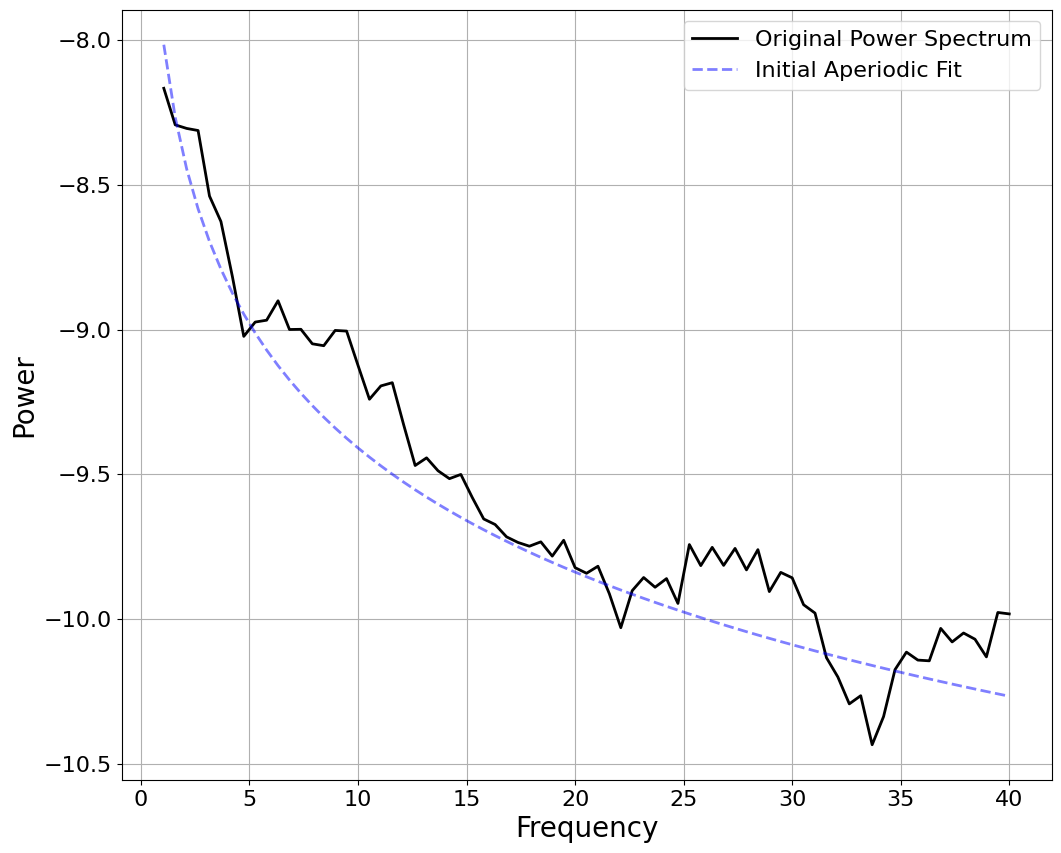

In [57]:
init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
plt_log = False
# Plot the initial aperiodic fit
_, ax = plt.subplots(figsize=(12, 10))
plot_spectrum(fm.freqs, fm.power_spectrum, plt_log,
              label='Original Power Spectrum', color='black', ax=ax)
plot_spectrum(fm.freqs, init_ap_fit, plt_log, label='Initial Aperiodic Fit',
              color='blue', alpha=0.5, linestyle='dashed', ax=ax)


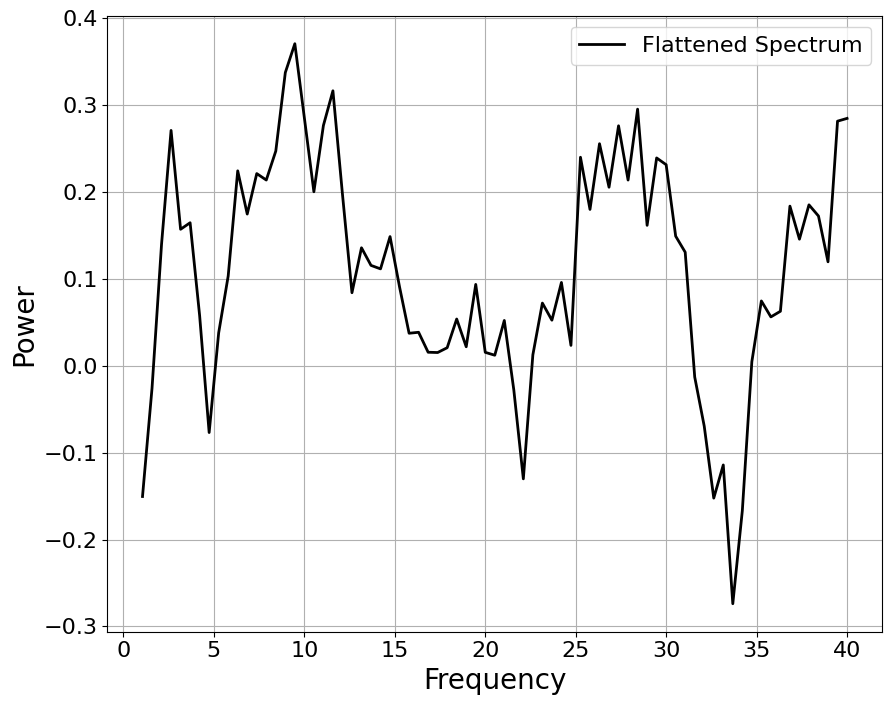

In [58]:
# Recompute the flattened spectrum using the initial aperiodic fit
init_flat_spec = fm.power_spectrum - init_ap_fit

# Plot the flattened the power spectrum
plot_spectrum(fm.freqs, init_flat_spec, plt_log,
              label='Flattened Spectrum', color='black')

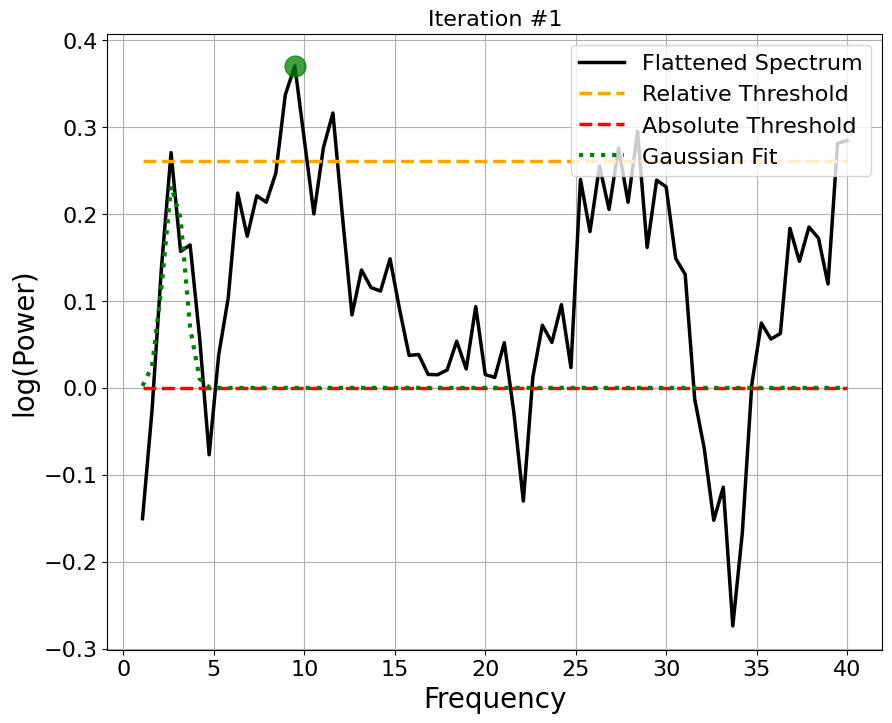

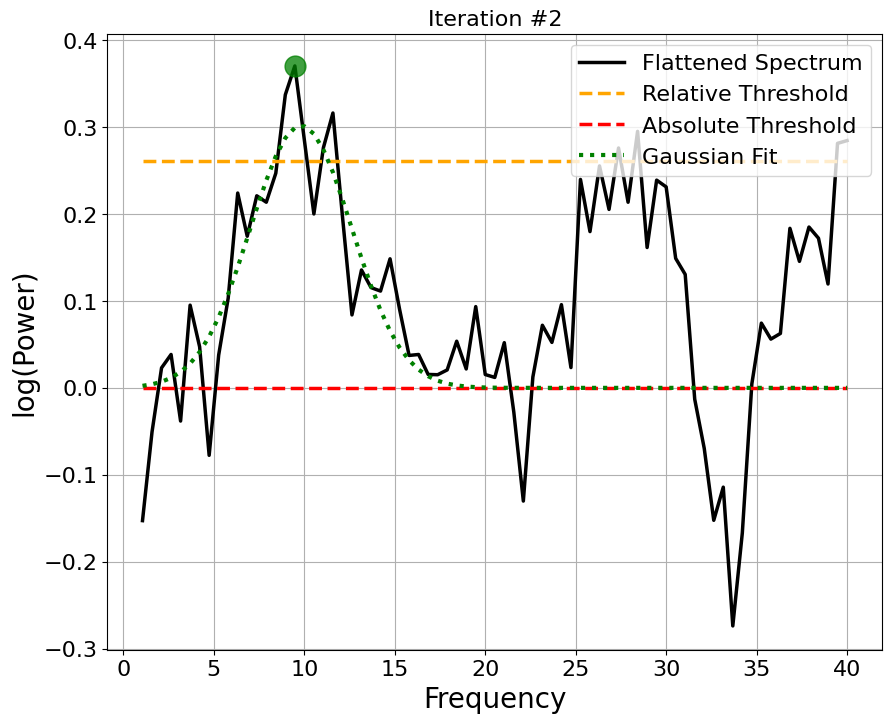

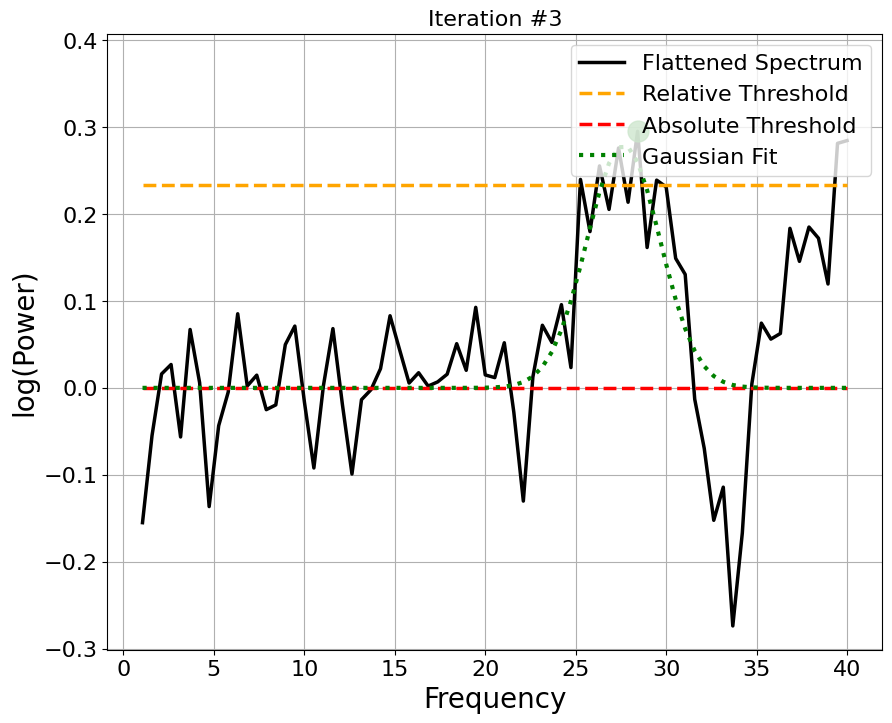

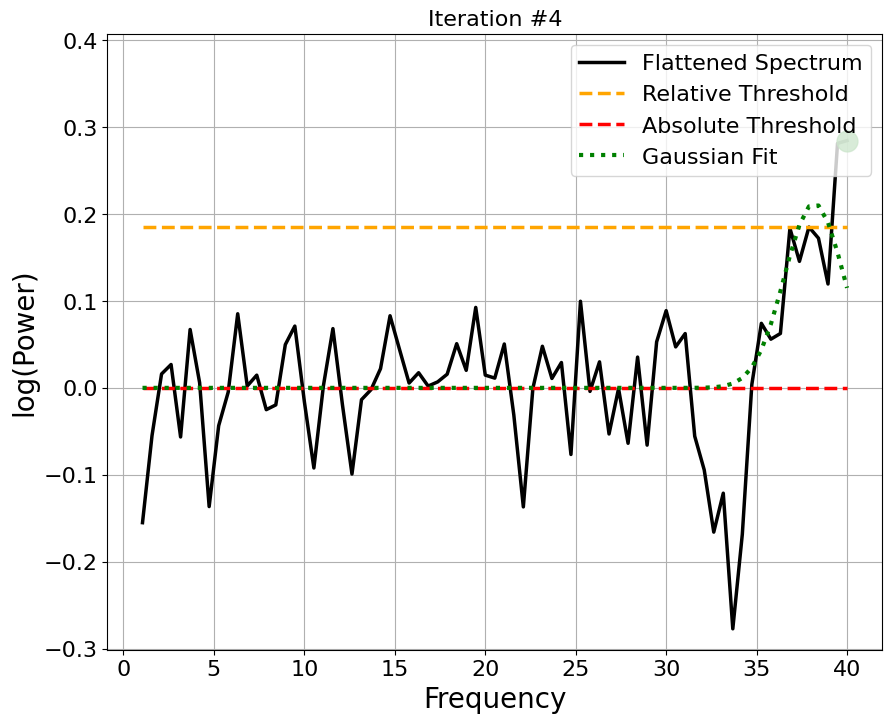

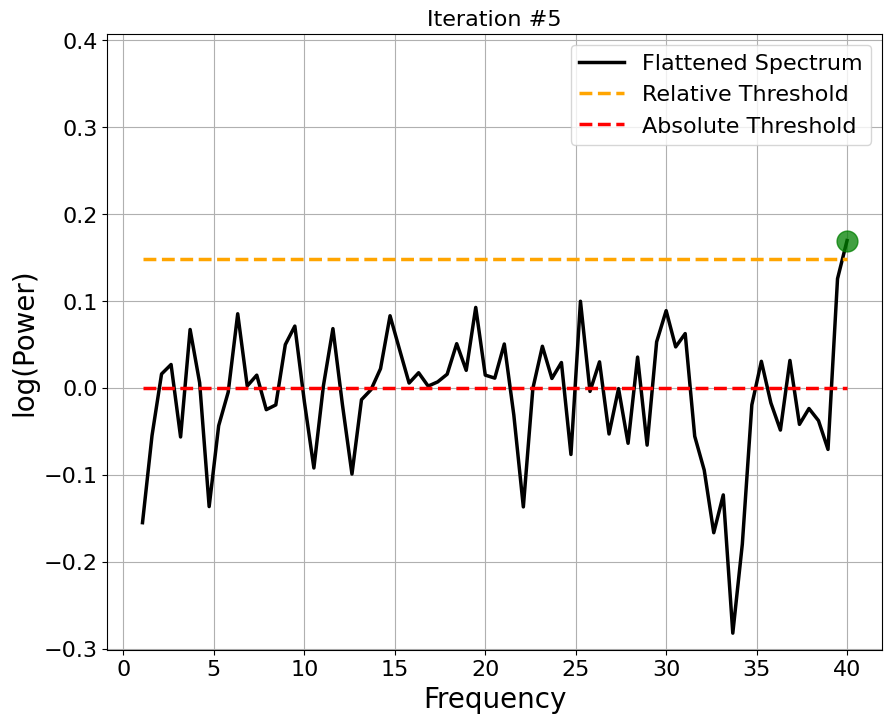

In [59]:
# Plot the iterative approach to finding peaks from the flattened spectrum
plot_annotated_peak_search(fm)

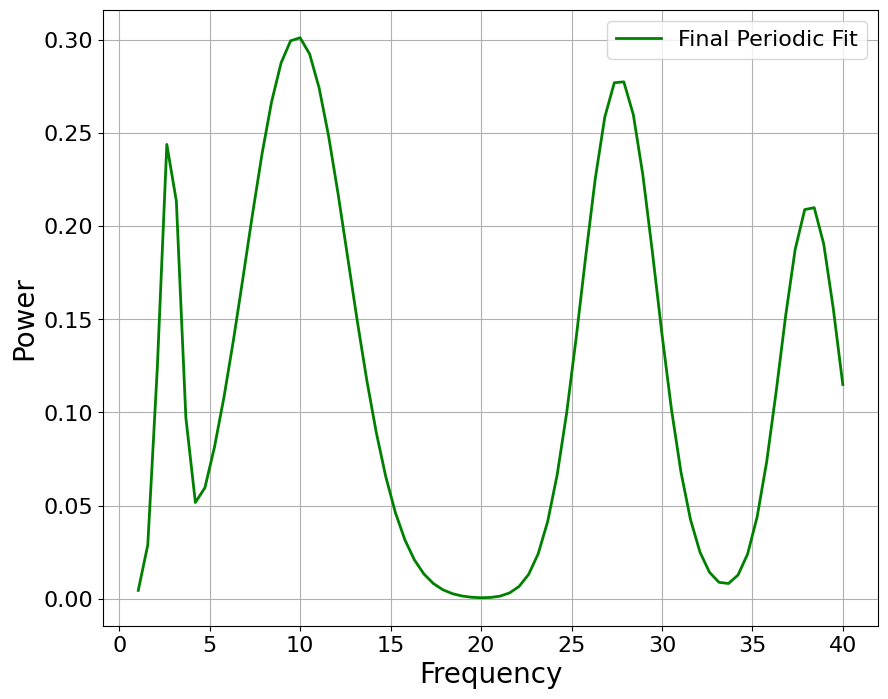

In [60]:
# Plot the peak fit: created by re-fitting all of the candidate peaks together
plot_spectrum(fm.freqs, fm._peak_fit, plt_log, color='green', label='Final Periodic Fit')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


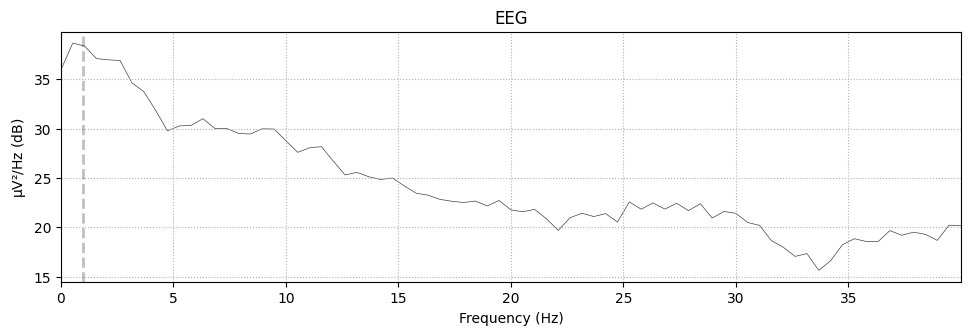

In [10]:
evoked_new.plot_psd(fmax=40)

In [11]:
from scipy import signal

In [27]:
sf = 5000
#win = 4 * sf
freqs, psd = signal.welch(data, sf)

In [31]:
np.squeeze(psd)

array([6.29404506e-15, 3.29515870e-14, 1.77662298e-14, 1.01926174e-14,
       9.71643214e-15, 8.00016881e-15, 2.29853628e-15, 7.65597046e-17,
       1.43720452e-18, 2.16184868e-19, 6.34819086e-20, 2.40416410e-20,
       2.72505716e-20, 8.82680329e-20, 2.84883997e-20, 2.10787460e-21,
       1.33449968e-21, 8.97469834e-22, 8.91871920e-22, 1.49012983e-20,
       1.93898685e-20, 1.50254340e-21, 1.88171671e-22, 1.28245681e-22,
       9.74819524e-23, 1.02451616e-21, 6.18947558e-21, 2.35017398e-21,
       4.36445609e-23, 3.09281424e-23, 3.15661668e-23, 1.91360982e-22,
       1.13796974e-20, 1.87361133e-20, 1.60295681e-21, 2.18505414e-23,
       8.60269942e-24, 7.76864708e-24, 1.71755497e-22, 1.29397632e-21,
       6.19317929e-22, 6.79066971e-24, 3.01045800e-24, 2.71485971e-24,
       2.35437841e-24, 3.75187474e-24, 6.48569473e-24, 1.82922663e-24,
       1.37440043e-24, 1.17522913e-24, 1.23366870e-24, 3.83257801e-24,
       2.57173995e-23, 1.68342405e-23, 7.25490963e-25, 5.85143161e-25,
      

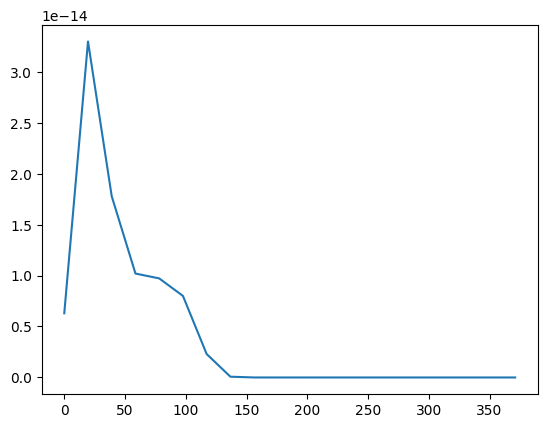

In [40]:
plt.plot(freqs[:20],np.squeeze(psd)[:20])

In [25]:
data = evoked_new.get_data()

In [56]:
mne.viz.set_browser_backend('matplotlib')

Using matplotlib as 2D backend.


'qt'

In [57]:
%matplotlib inline

In [3]:
pip install pactools

  Using cached pactools-0.3.1-py3-none-any.whl (82 kB)
  Using cached h5py-3.7.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.5 MB)
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_v

In [5]:
raw_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/fif/sub22_ses00-raw.fif'
raw = mne.io.read_raw_fif(raw_dir)
raw

Opening raw data file /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/fif/sub22_ses00-raw.fif...
    Range : 0 ... 479599 =      0.000 ...    95.920 secs
Ready.


<Raw | sub22_ses00-raw.fif, 73 x 479600 (95.9 s), ~103 kB, data not loaded>

In [6]:
stim_chan = raw.copy().pick_channels(['stim'])
events = mne.event.find_events(stim_chan)


31 events found
Event IDs: [1 2]


In [9]:
high_sig

array([[ 0.0001793,  0.0001775,  0.0001763, ..., -0.000106 , -0.0001068,
        -0.0001074]])

In [47]:
"""
Interface with MNE-python
-------------------------
This example shows how to use this package with MNE-python.
It relies on the function ``raw_to_mask``, which takes as input a MNE.Raw
instance and an events array, and returns the corresponding input signals
and masks for the ``Comodulogram.fit`` method.
"""
import mne
import numpy as np
import os.path as op
import matplotlib.pyplot as plt

from pactools import simulate_pac, raw_to_mask, Comodulogram, MaskIterator

tmin = 0.1
tmax = 1.8

#selecting the channels
ixs = (20,20)
###############################################################################
# Let's plot the signal and its power spectral density to visualize the data.
# As shown in the plots below, there is a peak for the driver frequency at
# 3 Hz and a peak for the carrier frequency at 50 Hz but phase-amplitude
# coupling cannot be seen in the evoked plot by eye because the signal is
# averaged over different phases for each epoch.

#raw.plot_psd(fmax=60)
#epochs = mne.Epochs(raw, events, tmin=-3, tmax=3)
epochs.average().plot()


###############################################################################
# Then, we create the inputs with the function raw_to_mask, which creates the
# input arrays and the mask arrays. These arrays are then given to a
# comodulogram instance with the `fit` method, and the `plot` method draws the
# results.

# create the input array for Comodulogram.fit

#low_sig, high_sig, mask = raw_to_mask(raw, ixs=ixs, events=events, tmin=tmin,
                                      tmax=tmax)

###############################################################################
# The mask is an iterable which goes over the _unique_ events in the event
# array (if it is 3D). PAC is estimated where the `mask` is `False`.
# Alternatively, we could also compute the `MaskIterator` object directly.
# This is useful if you want to compute PAC on other kinds of time series,
# for example source time courses.

low_sig, high_sig = raw[ixs[0], :][0], raw[ixs[1], :][0]
mask = MaskIterator(events, tmin, tmax, raw.n_times, raw.info['sfreq'])

# create the instance of Comodulogram
estimator = Comodulogram(fs=raw.info['sfreq'],
                         low_fq_range=np.linspace(1, 10, 20), low_fq_width=2.,
                         method='duprelatour', progress_bar=True)
# compute the comodulogram
estimator.fit(low_sig, high_sig, mask)
# plot the results
estimator.plot(tight_layout=False)
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 56)

In [17]:
low_sig, high_sig = raw[ixs[0], :][0], raw[ixs[1], :][0]


In [19]:
high_sig

array([[2.61000005e-05, 2.44999992e-05, 2.23999996e-05, ...,
        1.85999997e-05, 1.75000005e-05, 1.58000003e-05]])

In [5]:
pip install tensorpac

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above 

Phase Amplitude Coupling object defined
    extract phases (n_pha=145) and amplitudes (n_amps=139)
    true PAC estimation using Gaussian Copula PAC (gcPac)


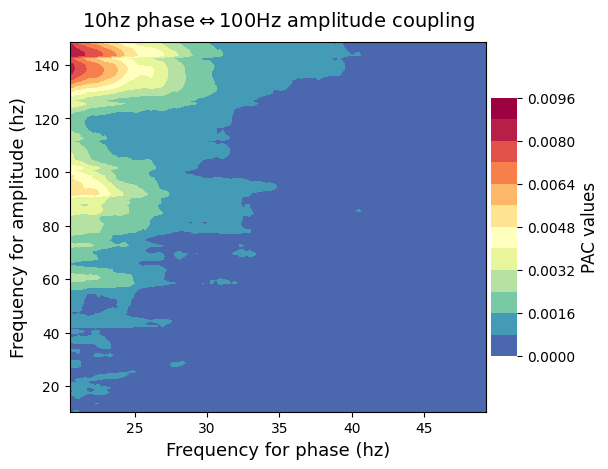

In [120]:
from tensorpac import Pac
from tensorpac.signals import pac_signals_tort

# Dataset of signals artificially coupled between 10hz and 100hz :
n_epochs = 20   # number of trials
n_times = 4000  # number of time points
sf = 1000   #512.       # sampling frequency

# Create artificially coupled signals using Tort method :
#data, time = pac_signals_tort(f_pha=10, f_amp=100, noise=2, n_epochs=n_epochs,
                             # dpha=10, damp=10, sf=sf, n_times=n_times)

# Define a Pac object
p = Pac(idpac=(6, 0, 0), f_pha=(20, 50, 1, .2), f_amp=(10, 150, 1, 1))
# Filter the data and extract pac
xpac = p.filterfit(sf, epochs.get_data()[:,19,:])

# plot your Phase-Amplitude Coupling :
p.comodulogram(xpac.mean(-1), cmap='Spectral_r', plotas='contour', ncontours=10,
               title=r'10hz phase$\Leftrightarrow$100Hz amplitude coupling',
               fz_title=14, fz_labels=13)

p.show()

In [89]:
data

array([[-1.06135531e-05, -3.38892733e-06,  1.96815563e-06, ...,
         4.91986521e-06,  7.51967093e-07, -6.85343184e-06],
       [-5.07373306e-06, -8.52280846e-06, -5.73278339e-06, ...,
        -6.71923544e-06,  1.76122398e-06,  8.94413733e-06],
       [-1.13890037e-05, -5.64218089e-06,  2.18684295e-06, ...,
         7.12736983e-06,  9.86901796e-06,  6.41843599e-06],
       ...,
       [ 1.64798359e-06,  7.58930992e-06,  9.07139565e-06, ...,
         1.30537474e-05,  5.80617598e-06, -1.82722829e-06],
       [ 6.22102925e-06,  2.83321401e-06, -5.02635203e-06, ...,
        -5.80128290e-06, -1.17752361e-05, -1.00581419e-05],
       [-1.21144367e-05, -1.65571437e-05, -1.52335770e-05, ...,
        -1.07108190e-05, -2.73064416e-06,  5.30136231e-06]])

In [182]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses00_final-epo.fif'
processed_dir5 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses05_final-epo.fif'
processed_dir10 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses10_final-epo.fif'
processed_dir1 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses01_final-epo.fif'
processed_dir2 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses02_final-epo.fif'
processed_dir3 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses03_final-epo.fif'
processed_dir4 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses04_final-epo.fif'
processed_dir6 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses06_final-epo.fif'
processed_dir7 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses07_final-epo.fif'
processed_dir8 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses08_final-epo.fif'
processed_dir9 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses09_final-epo.fif'


epochs0 = mne.read_epochs(processed_dir)
epochs5 = mne.read_epochs(processed_dir5)
epochs10 = mne.read_epochs(processed_dir10)
epochs1 = mne.read_epochs(processed_dir1)
epochs2 = mne.read_epochs(processed_dir2)
epochs3 = mne.read_epochs(processed_dir3)
epochs4 = mne.read_epochs(processed_dir4)
epochs6 = mne.read_epochs(processed_dir6)
epochs7 = mne.read_epochs(processed_dir7)
epochs8 = mne.read_epochs(processed_dir8)
epochs9 = mne.read_epochs(processed_dir9)




Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses00_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses05_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses10_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items

In [170]:
test = []
test.append(p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)

array([[[ 1.02329255,  1.08561235,  1.14792137, ..., -1.71974762,
         -1.65900055, -1.59820481],
        [ 0.29303108,  0.35864486,  0.42430448, ...,  0.25724835,
          0.32073656,  0.38425377],
        [-2.22071251, -2.15773   , -2.09476207, ...,  0.24672904,
          0.30979501,  0.3728794 ],
        ...,
        [-2.69891111, -2.63752998, -2.5761653 , ..., -2.29075074,
         -2.22884577, -2.16680107],
        [ 0.44054181,  0.4966972 ,  0.55257556, ..., -1.90944186,
         -1.85110699, -1.79275208],
        [ 1.50099262,  1.56971592,  1.63850549, ..., -1.94080964,
         -1.87497195, -1.8091252 ]],

       [[ 0.96331087,  1.02650463,  1.0896807 , ..., -1.70793987,
         -1.64615495, -1.58432289],
        [ 0.31926487,  0.38747549,  0.45573891, ...,  0.32534854,
          0.39005712,  0.45479489],
        [-2.25763317, -2.19351794, -2.12941609, ...,  0.29098668,
          0.35529946,  0.41963846],
        ...,
        [-2.77752578, -2.71522057, -2.65293714, ..., -

In [183]:
list_epochs =(epochs0.get_data()[:,14,:], epochs1.get_data()[:,14,:], epochs2.get_data()[:,14,:], epochs3.get_data()[:,14,:],
             epochs4.get_data()[:,14,:],epochs5.get_data()[:,14,:],epochs6.get_data()[:,14,:],epochs7.get_data()[:,14,:],
             epochs8.get_data()[:,14,:],epochs9.get_data()[:,14,:],epochs10.get_data()[:,14,:])


Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=325)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=1227)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=6972)
    infer p-values

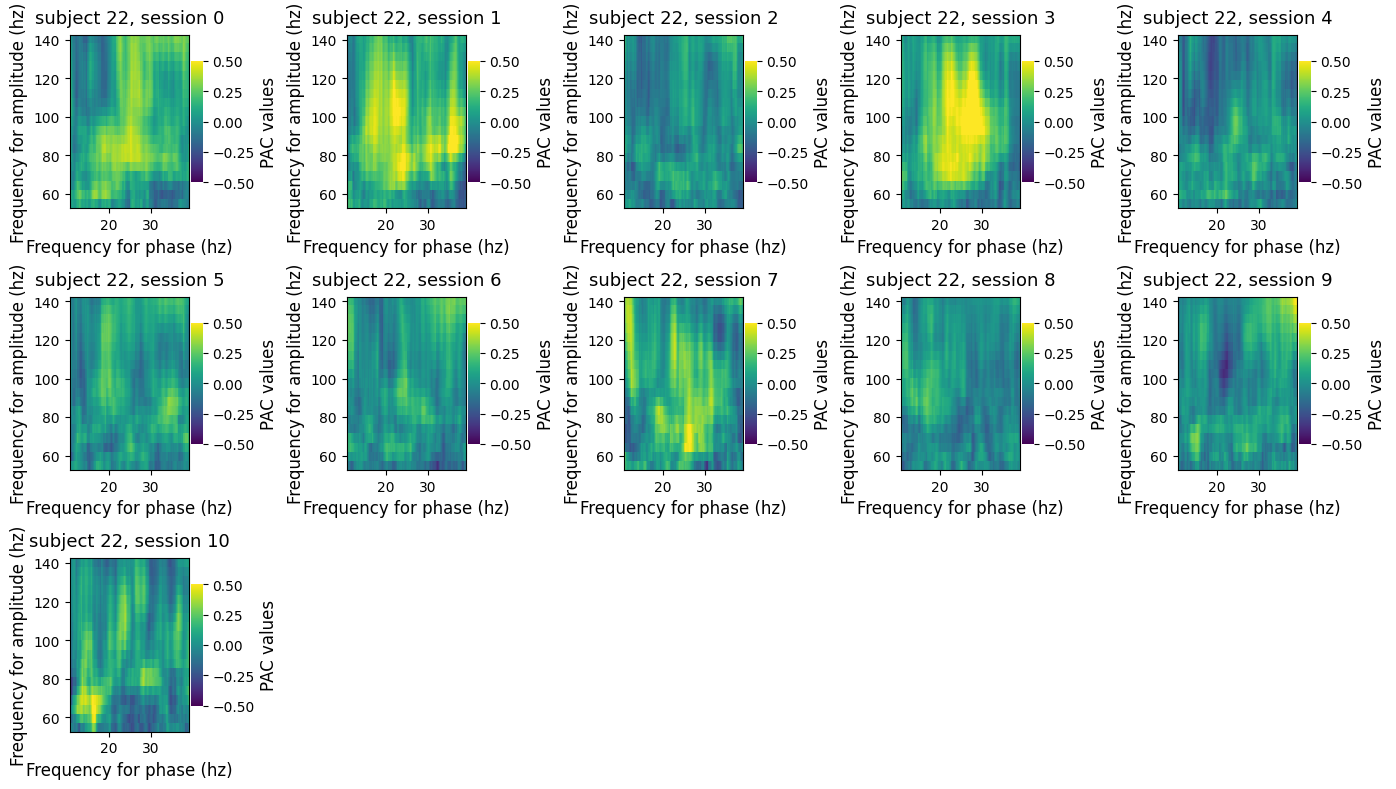

In [177]:
phases = []
amplitudes = []
plt.figure(figsize=(14, 8))
for i in range(0,len(list_epochs)):   
    cata_1_channel = list_epochs[i]
    sf = 1000
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 150, 5, 5), dcomplex='wavelet')
    # etract all of the phases and amplitudes
    phases = p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)
    amplitudes = p.filter(sf, cata_1_channel, ftype='amplitude', n_jobs=1)
    xpax = p.fit(phases, amplitudes)
    plt.subplot(3,5,i+1)
    p.comodulogram(xpax.mean(-1), title=f"subject 22, session {i}", cmap='viridis',vmax=0.5,vmin=-0.5)
plt.tight_layout()    
plt.show()

Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=6356)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=2838)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=8491)
    infer p-value

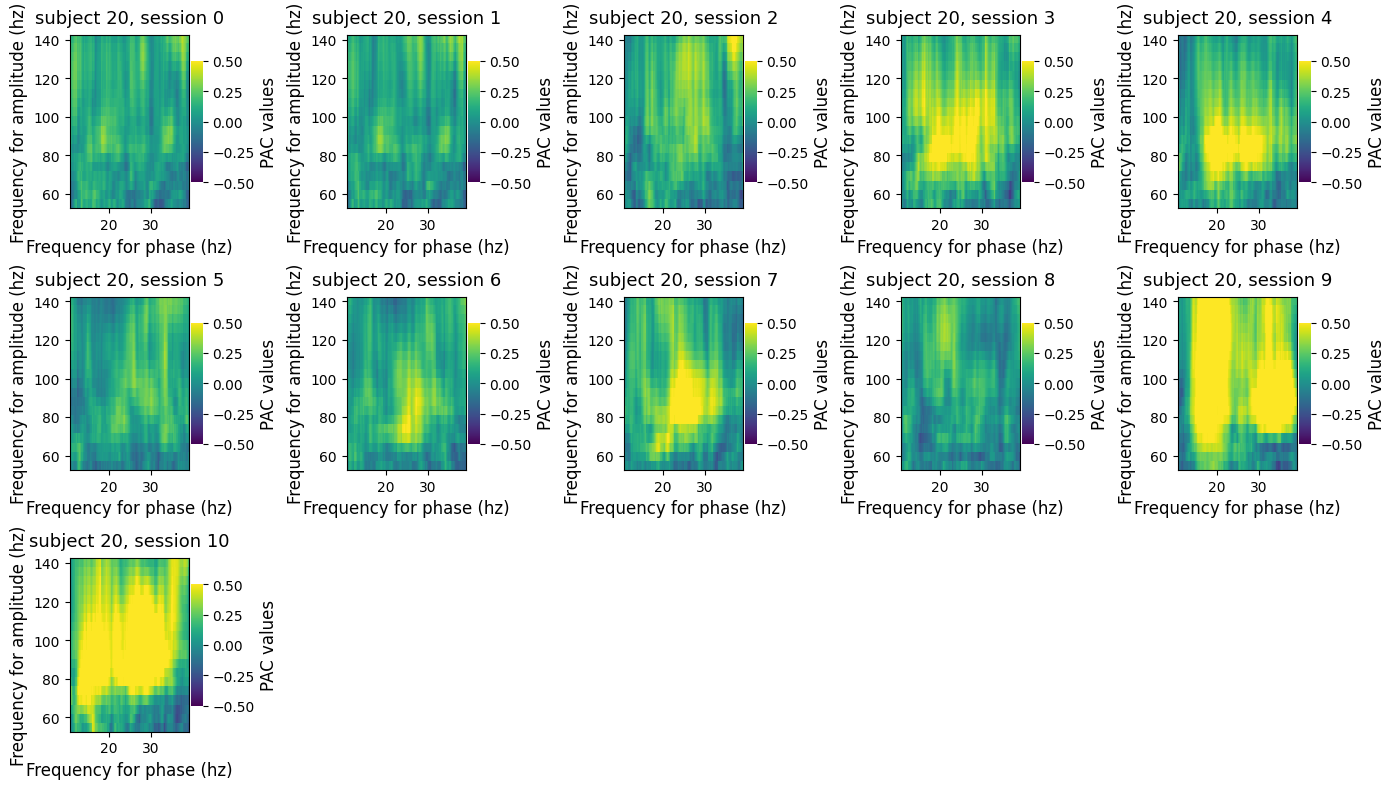

In [181]:
phases = []
amplitudes = []
plt.figure(figsize=(14, 8))
for i in range(0,len(list_epochs)):   
    cata_1_channel = list_epochs[i]
    sf = 1000
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 150, 5, 5), dcomplex='wavelet')
    # etract all of the phases and amplitudes
    phases = p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)
    amplitudes = p.filter(sf, cata_1_channel, ftype='amplitude', n_jobs=1)
    xpax = p.fit(phases, amplitudes)
    plt.subplot(3,5,i+1)
    p.comodulogram(xpax.mean(-1), title=f"subject 20, session {i}", cmap='viridis',vmax=0.5,vmin=-0.5)
plt.tight_layout()    
plt.show()

Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=9157)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=3988)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=8511)
    infer p-value

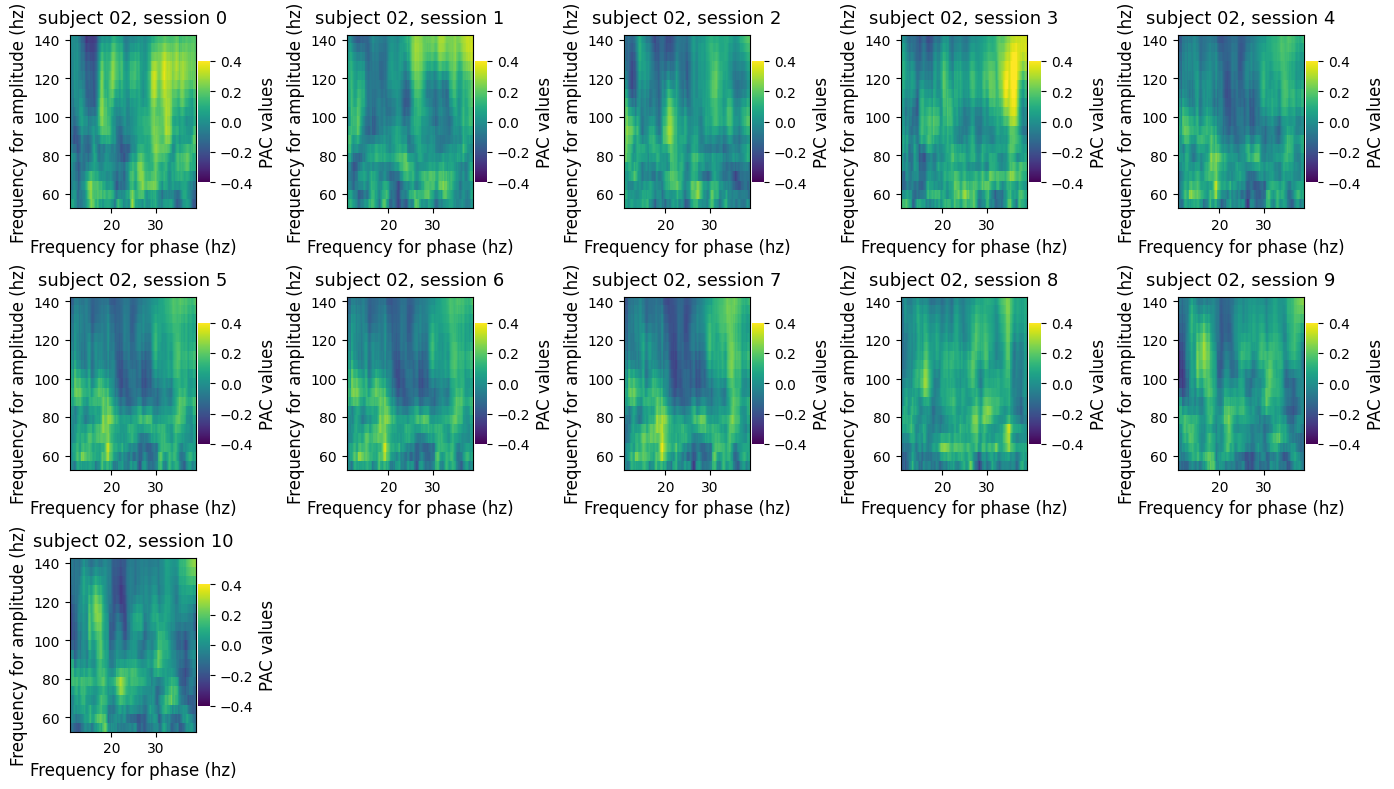

In [185]:
phases = []
amplitudes = []
plt.figure(figsize=(14, 8))
for i in range(0,len(list_epochs)):   
    cata_1_channel = list_epochs[i]
    sf = 1000
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 150, 5, 5), dcomplex='wavelet')
    # etract all of the phases and amplitudes
    phases = p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)
    amplitudes = p.filter(sf, cata_1_channel, ftype='amplitude', n_jobs=1)
    xpax = p.fit(phases, amplitudes)
    plt.subplot(3,5,i+1)
    p.comodulogram(xpax.mean(-1), title=f"subject 02, session {i}", cmap='viridis',vmax=0.4,vmin=-0.4)
plt.tight_layout()    
plt.show()

In [150]:
xpax0 = p.fit(phases_0, amplitudes_0)
xpax5 = p.fit(phases_5, amplitudes_5)
xpax10 = p.fit(phases_10, amplitudes_10)


#p.comodulogram(xpac.mean(-1), title="hello", cmap='viridis')

    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=4778)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=9616)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=9739)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surroga

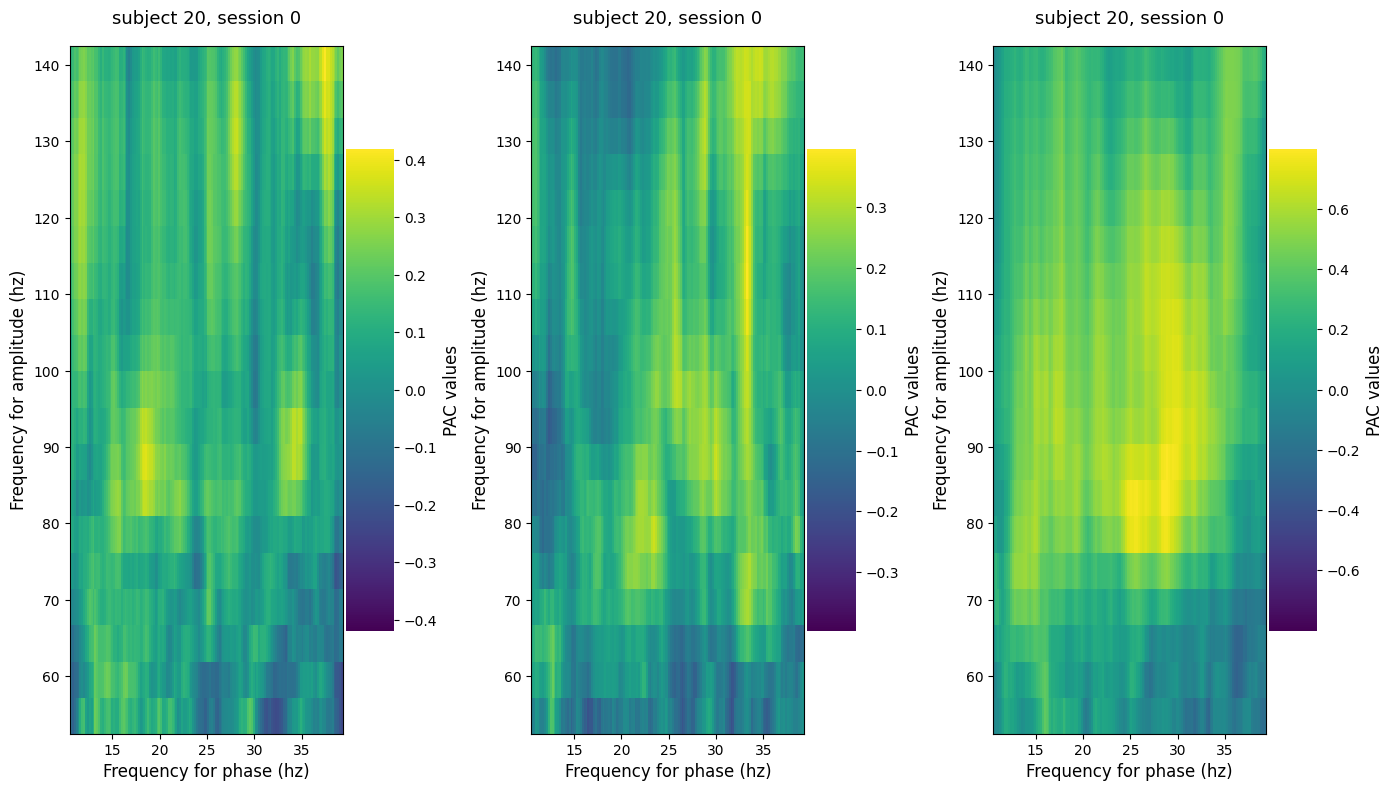

In [153]:
# For session 0 subject 20
plt.figure(figsize=(14, 8))
plt.subplot(1,3,1)
p.comodulogram(xpax0.mean(-1), title="subject 20, session 0", cmap='viridis')
plt.subplot(1,3,2)
p.comodulogram(xpax5.mean(-1), title="subject 20, session 0", cmap='viridis')
plt.subplot(1,3,3)
p.comodulogram(xpax10.mean(-1), title="subject 20, session 0", cmap='viridis')
plt.tight_layout()
plt.show()

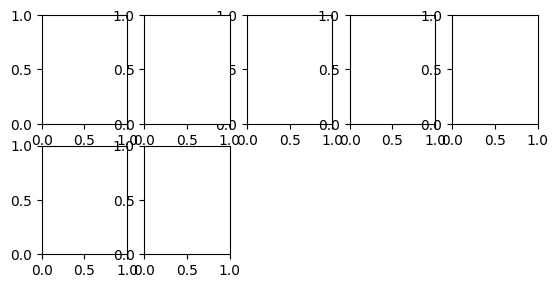

In [176]:
plt.subplot(3,5,3)
plt.subplot(3,5,4)
plt.subplot(3,5,1)
plt.subplot(3,5,2)
plt.subplot(3,5,5)
plt.subplot(3,5,6)
plt.subplot(3,5,7)


plt.show()

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

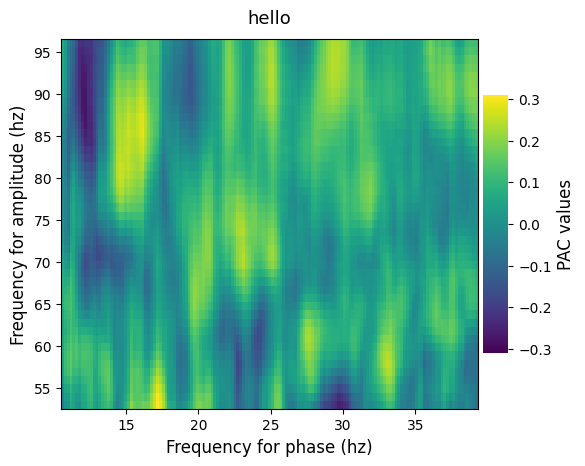

In [114]:
# For session 0
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

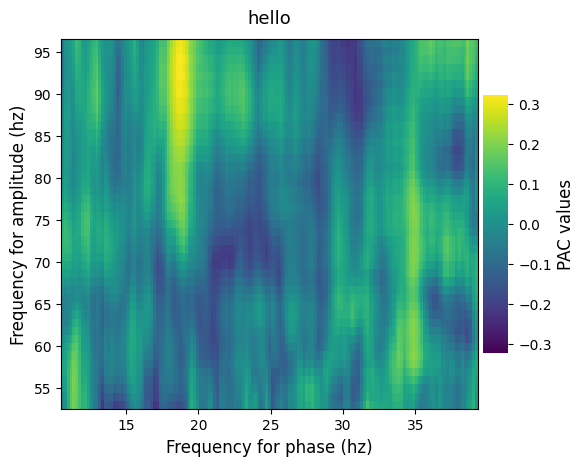

In [118]:
#For session 5
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

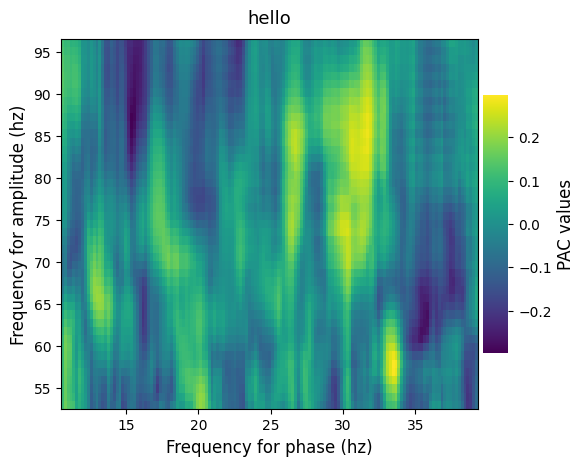

In [110]:
#For session 10
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

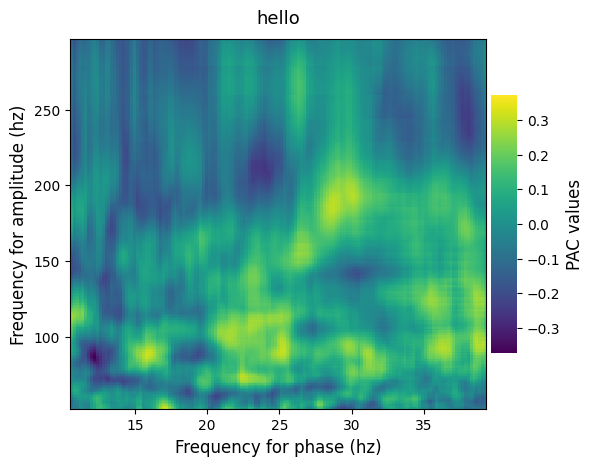

In [66]:
# For session 0
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

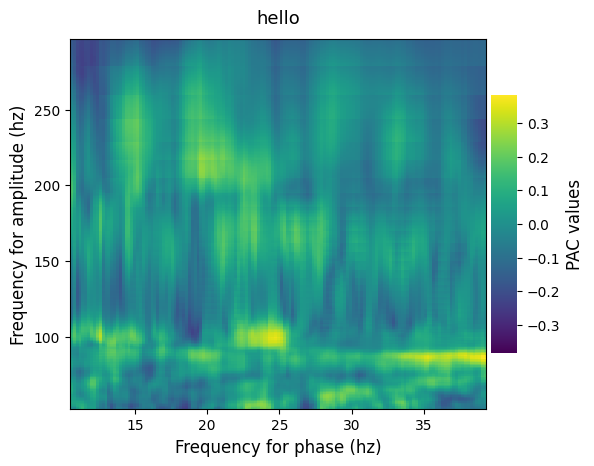

In [82]:
# or session 5
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

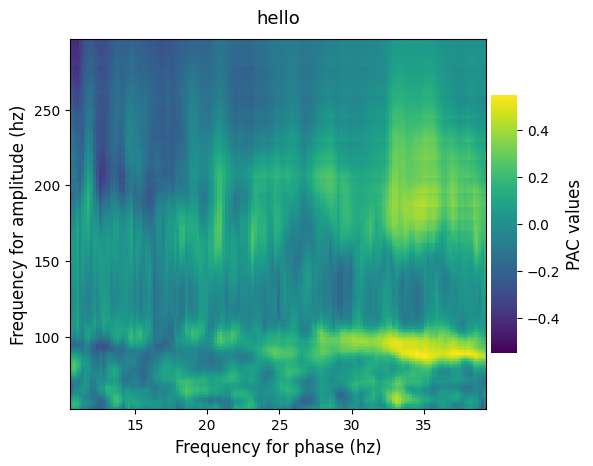

In [76]:
#For session 10
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

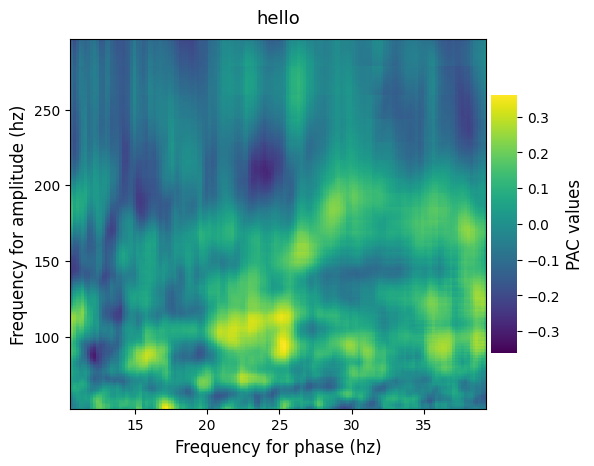

In [100]:
# For session 0
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

In [83]:
# define a :class:`tensorpac.Pac` object and use the MVL as the main method
# for measuring PAC
data = epochs.copy().get_data()[:,19,:]
sf=1000
p = Pac(idpac=(1, 0, 0), f_pha=(10, 40, 1, .2), f_amp=(50, 350, 5, 1),
        dcomplex='wavelet', width=12)

# Now, extract all of the phases and amplitudes
phases = p.filter(sf, data, ftype='phase')
amplitudes = p.filter(sf, data, ftype='amplitude')

WARNING | MVL is amplitude dependent which means that if the amplitude increases, MVL also increases. You should select a normalization method for correcting this limitation (e.g idpac=(1, 2, 4))
Phase Amplitude Coupling object defined


In [28]:
epochs.get_data().shape

(28, 64, 9501)

WARNING | If you want to normalize the estimated PAC, you should select a surrogate method (second digit of `idpac`). Normalization ignored.
    true PAC estimation using Phase-Locking Value (PLV, Penny et al. 2008)
    true PAC estimation using Phase-Locking Value (PLV, Penny et al. 2008)
    compute surrogates (Permute phase across trials (Tort et al. 2010), 20 permutations, random_state=165)
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract the mean of surrogates)
    true PAC estimation using Phase-Locking Value (PLV, Penny et al. 2008)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 20 permutations, random_state=6375)
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surroga

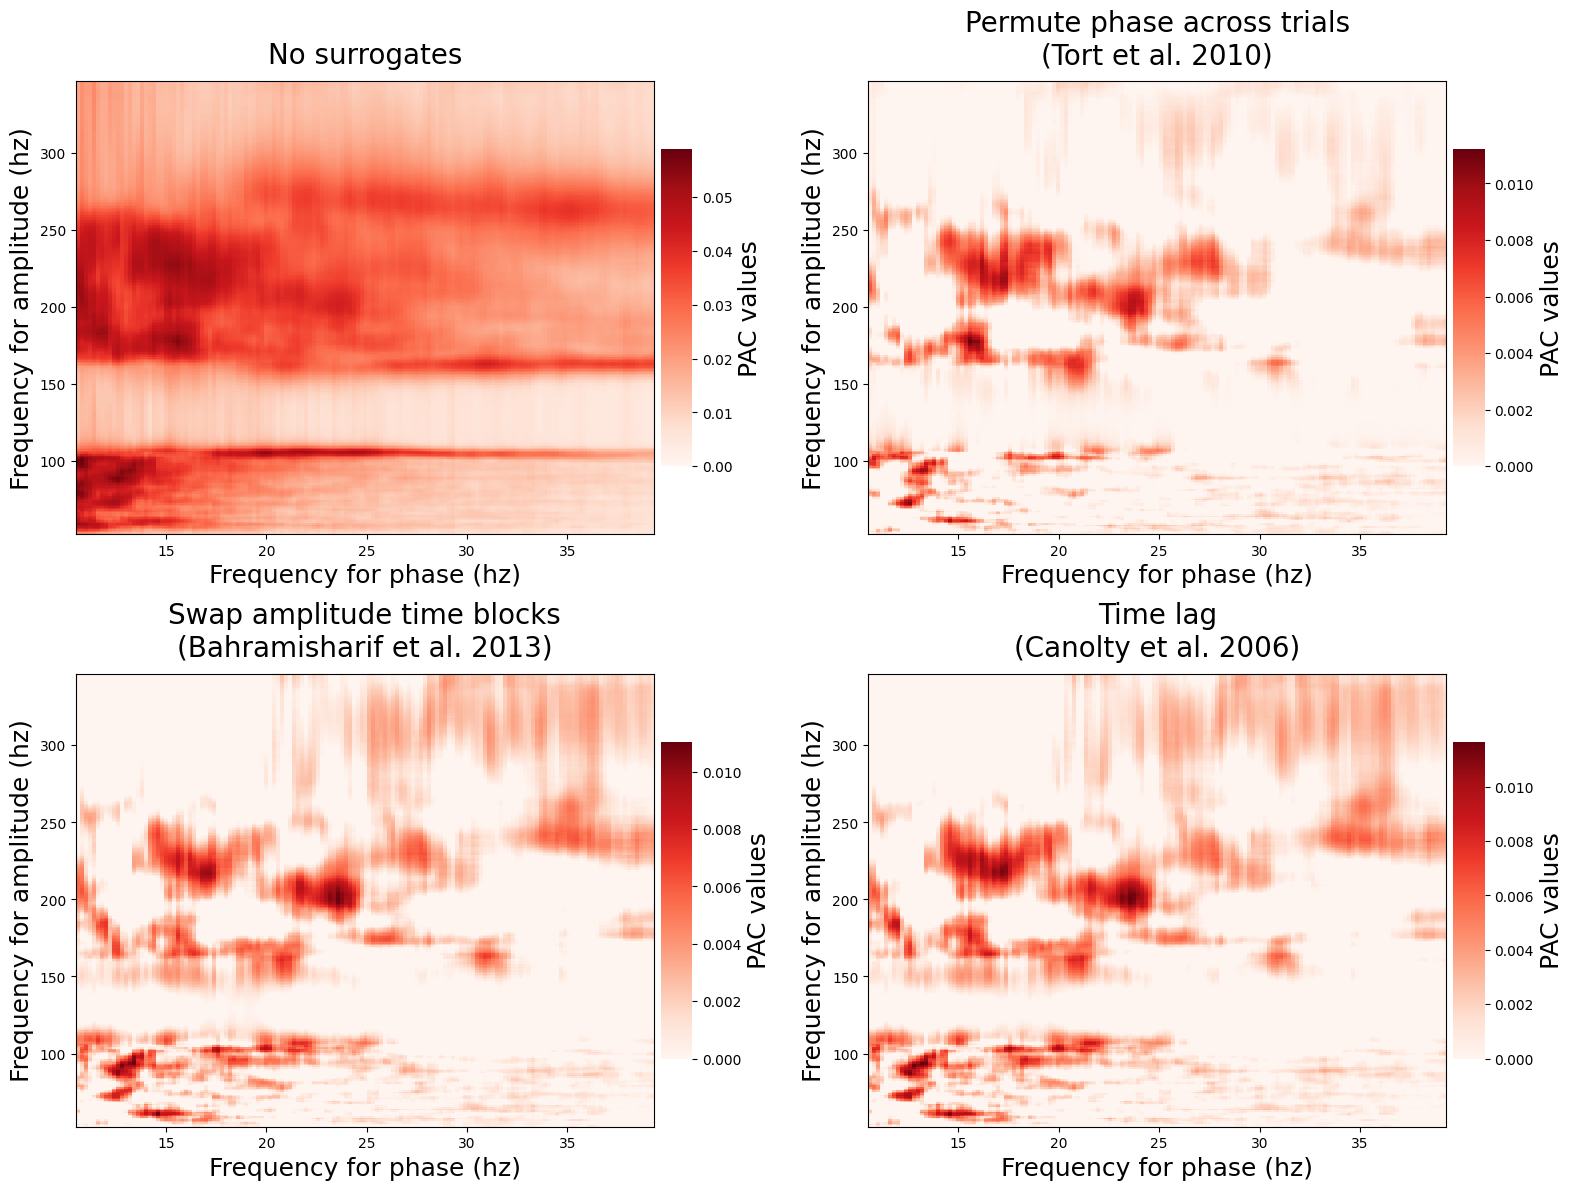

In [84]:
plt.figure(figsize=(16, 12))
for i, k in enumerate(range(4)):
    # change the pac method
    p.idpac = (5, k, 1)
    # compute only the pac without filtering
    xpac = p.fit(phases, amplitudes, n_perm=20)
    # plot
    title = p.str_surro.replace(' (', '\n(')
    plt.subplot(2, 2, k + 1)
    p.comodulogram(xpac.mean(-1), title=title, cmap='Reds', vmin=0,
                   fz_labels=18, fz_title=20, fz_cblabel=18)

plt.tight_layout()

plt.show()